In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('sales_data_sample.xlsx', sheet_name="saledata")
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [5]:
#1 Hãy cho biêt kích thước của dữ liệu
df.shape

(2823, 10)

In [ ]:
#2 Hãy cho biết hóa đơn 10107 có bao nhiêu dòng sản phẩm
df[df['ORDERNUMBER'] == 10107]
# hoặc df.loc['ORDERNUMBER'] == 10107]
# ans : 8 dòng

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.0,41.9136
54,10107,39,5,3896.49,2003-02-24,Shipped,USA,Medium,0.0,298.6855
80,10107,27,4,6065.55,2003-02-24,Shipped,USA,Medium,0.0,8.0352
240,10107,21,1,3036.60,2003-02-24,Shipped,USA,Medium,0.2,11.1944
804,10107,29,6,2055.23,2003-02-24,Shipped,USA,Small,0.0,6.2152
1466,10107,25,3,2845.75,2003-02-24,Shipped,USA,Small,0.2,-10.7973
1564,10107,38,7,3155.14,2003-02-24,Shipped,USA,Medium,0.0,17.7450
2173,10107,20,8,1858.00,2003-02-24,Shipped,USA,Small,0.8,-13.8960


<function matplotlib.pyplot.show(close=None, block=None)>

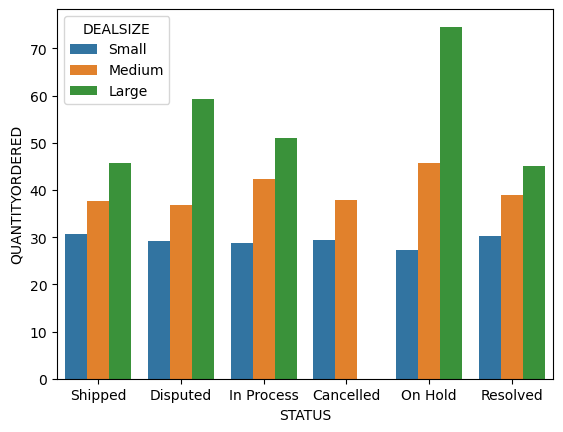

In [ ]:
# Hãy cho biết biểu đồ thể hiện trung bình số lượng
#  của sản phẩm trên từng nhóm DEALSIZE và STATUS. Thì nhóm
# STATUS nào chỉ có 2 cột hiển thị
sns.barplot(x='STATUS', y = 'QUANTITYORDERED', hue='DEALSIZE', data=df, errorbar=None)
plt.show

#ans : Cancelled


In [ ]:
# Có mối liên hệ nào giữa trạng thái giao hàng và
#  giá trị đặt hàng hay không 

import statsmodels.api as sm
from statsmodels.formula.api import ols
# phải là    ĐL    ~  ĐT
model = ols('SALES ~ STATUS', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# anpha 0.003661 < 0.05 => bác bỏ
#ans : có phụ thuộc

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


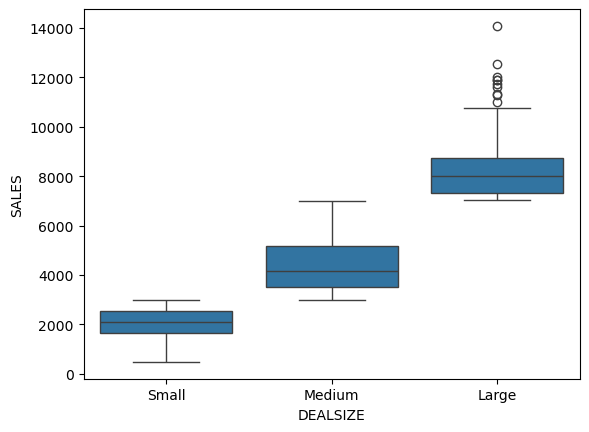

In [ ]:
#Hãy cho biết dựa vào biểu đồ boxplot về doanh số
#trên từng nhóm kích thước đặt hàng thì yếu tố về kích thước
#đặt hàng có vai trò trong việc dự báo giá trị đặt hàng hay ko

sns.boxplot(x='DEALSIZE', y='SALES', data=df)
df
# or plt.show()
#anass : có

# vì biểu đồ có sự khác biệt rõ ràng giữa các cột, cột Large có
# median cao hơn nhiều so với Small hoặc Medium -> ans: có
# ngược lại: 
# nếu các boxplot, các cột chồng chéo lên nhau thì -> ans: ko


In [ ]:
#Hãy cho biết dựa vào biểu đồ boxplot 
# về doanh số trên từng nhóm kích thước đặt hàng, nếu có 
# dữ liệu thiếu trên nhóm DEALSIZE = Medium thì dữ liệu thiếu
#  đó nên được thay thế bằng



#ans : c: Trung bình SALES CỦA NHÓM Medium

In [ ]:
#Nếu sử dụng One Hot Encoding để số hóa dữ liệu DEALSIZE 
# thì kết quả của dòng cuối cùng là bao nhiêu

#Encoding to vectorize
from sklearn.preprocessing import OneHotEncoder
y= OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

#ans: [0. 1. 0.]

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:

# th01-32: Nếu sử dụng Max Absolute Scaler cho SALES
#  thì giá trị có index = 100 được scale thành bao nhiêu

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(df[['SALES']])
scaled= scaler.transform(df[['SALES']])
scaled_df= pd.DataFrame(scaled, columns=df[['SALES']].columns)

print(scaled_df.iloc[100])

#ans 0.212325

SALES    0.212325
Name: 100, dtype: float64


In [ ]:
#th01-38: Hãy sắp xếp giảm dần theo cho mức độ lệch 
# của SALES sau khi được transform lần lượt 
# qua hàm log, sqrt, square và cube root

import numpy as np


print(df['SALES'].skew())

print(np.log(df['SALES']).skew())

print(np.sqrt(df['SALES']).skew())

print(np.square (df ['SALES']).skew())

print(np.cbrt(df['SALES']).skew())

#ans : square, chưa transform, sqrt, cube root, log

1.161076000881289
-0.2021742362869817
0.47281500087876144
2.915766495908139
0.25086487312083416


0.7679976616615047


[]

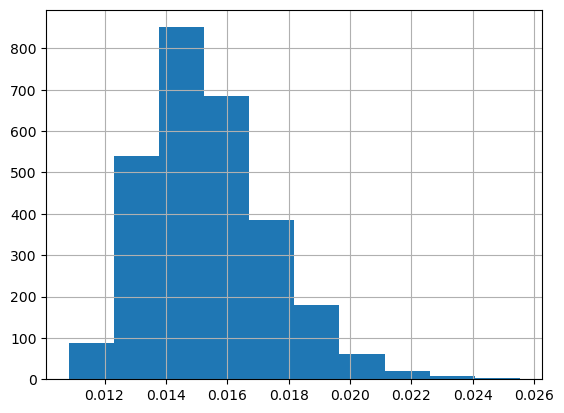

In [ ]:
#th01-39: Hãy tính giá trị lệch của SALES sau khi được transform 
# qua hàm f(x) = 1/(log(x)^2 + 1)

Answer: 0.7679976616615047

...

def fx(x):
   return 1/(np.log(x)**2 + 1)

sales_trans = fx(df ['SALES'])

print(sales_trans.skew())

#biểu diễn trên biểu đồ nếu đề cần
sales_trans.hist()

plt.plot()

##ans : 0.7679976616615047